# 와인 품질 분류

wine_quality.csv 파일이 존재합니다.

와인의 여러가지 화학 성분을 기반으로 와인의 품질을 분류해내는 것이 목표입니다.

- index 구분자
- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

데이터셋 출처: https://dacon.io/competitions/open/235610/data

(학습을 위해 원래 데이터셋에서 test.csv는 제외하고, train.csv 파일만을 고려하여 진행했습니다.)

In [1]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#데이터셋 불러오기
wine_data = pd.read_csv('wine_quality.csv')

## 데이터 전처리, EDA 및 시각화

### wine_data 데이터를 살펴보고, 쓸모 없는 column을 삭제하시오.(index column 삭제)

In [3]:
wine_data.head(5)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
del wine_data['index']

In [5]:
print(wine_data.columns)

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')


### info()를 결측치가 있는지 확인하고, describe()를 통해 수치형 피쳐들의 scale을 살펴보고, 스케일링을 진행해야 하는지 살펴보시오. 

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


-> train, test 모두 결측치 없음!

In [7]:
wine_data.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


-> 각 피쳐끼리 단위가 달라 스케일링 작업이 필요하다.

### wine_data에서 각 피쳐들 간의 상관관계를 나타내는 히트맵을 출력하시오.

<AxesSubplot:>

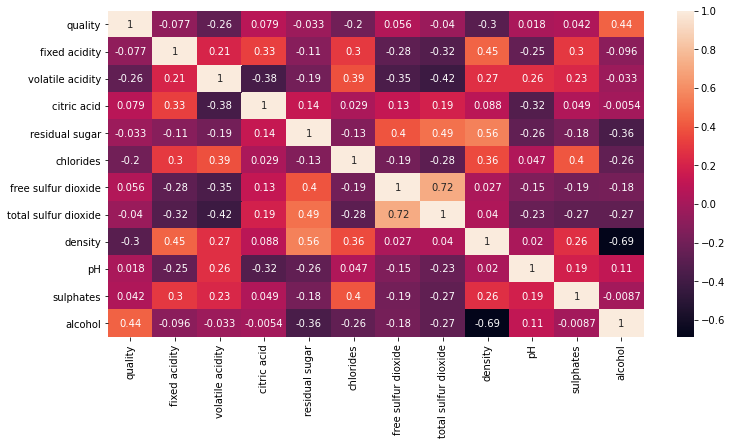

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(wine_data.corr(), annot=True)

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_wine, y_wine으로 저장하시오. (target은 quality)

In [9]:
X_wine = wine_data.drop(['quality'], axis=1)
y_wine = wine_data['quality']

In [10]:
#데이터 확인(X_wine)
X_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [11]:
#데이터 확인(y_wine)
y_wine.head(3)

0    5
1    5
2    5
Name: quality, dtype: int64

### 피쳐값 중 카테고리 변수가 1가지 있다. 이에 대해 Encoding을 진행하시오.

In [12]:
#type 피쳐에 대해 Encoding 진행
X_wine['type'] = pd.get_dummies(X_wine['type'])

In [13]:
#Encoding이 잘 되었는지 확인
X_wine['type']

0       0
1       1
2       0
3       0
4       0
       ..
5492    0
5493    0
5494    0
5495    0
5496    0
Name: type, Length: 5497, dtype: uint8

### 피쳐값에 대해 MinMaxScaler()를 이용해 스케일링을 하시오.
- 스케일링 된 피쳐값은 데이터프레임 형식으로 X_wine_scaled에 저장

In [14]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler = MinMaxScaler()
scaler.fit(X_wine)
X_wine_scaled = scaler.transform(X_wine)
X_wine_scaled = pd.DataFrame(data=X_wine_scaled, columns=X_wine.columns)

In [15]:
#Scaling 잘 되었는지 확인
X_wine_scaled.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,0.0
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,1.0
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,0.0


### train_test_split()을 이용해 train set와 test set를 분리하시오.
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 123

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine_scaled, y_wine, test_size=0.2, random_state=123)

In [17]:
#잘 분리되었는지 확인
print(X_train.shape, X_test.shape)

(4397, 12) (1100, 12)


### GradientBoostingClassifier을 사용해 train data를 fit 한 후, test data로 예측을 수행하고 정확도를 구하시오

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

gb_clf=GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
print('정확도: {0:.4f}'.format(gb_accuracy))

정확도: 0.5427


### GridSearchCV를 사용해 최적 하이퍼 파라미터 조합을 찾으시오
params={
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,500]
}

In [19]:
from sklearn.model_selection import GridSearchCV

params={
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,500]
}

grid_cv=GridSearchCV(gb_clf,param_grid=params, cv=2)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)

최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}


최적으로 학습된 estimator로 예측을 수행하시오

In [20]:
gb_pred=grid_cv.best_estimator_.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
print('정확도: {0:.4f}'.format(gb_accuracy))

정확도: 0.5636


## XGBoost 및 LightGBM 실습

### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도 및 F1 스코어를 출력하시오.
- n_estimators=400
- learning_rate = 0.1
- max_depth = 3

In [21]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
y_preds = xgb_wrapper.predict(X_test)

[18:57:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
#accuracy_score(), f1_score 임포트
#f1_score는 기본적으로 이진분류에 사용되므로, 다중분류에서 사용하고 싶으면 average='무엇무엇' 설정해주면 됨
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 공식 문서 참고

from sklearn.metrics import accuracy_score, f1_score

print('모델의 정확도:', accuracy_score(y_test, y_preds))
print('모델의 F1 스코어:', f1_score(y_test, y_preds, average='weighted'))

모델의 정확도: 0.5854545454545454
모델의 F1 스코어: 0.5750880303152167


### 사이킷런 래퍼 클래스 LightGBM와 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합과 그 하이퍼 파라미터의 예측 정확도를 구하시오.
- 'n_estimators' : [100,200,300,400,500]
- 'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2]
- 'max_depth' : [3,4,5,6,7]

(제 컴퓨터에선 2분정도 걸려욤)

In [23]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

params = {
    'n_estimators' : [300,400,500],
    'learning_rate' : [0.01, 0.1, 0.15],
    'max_depth' : [3,5,7]
}

lgbm_wrapper = LGBMClassifier()
lgbm_wrapper.fit(X_train, y_train)
grid_cv = GridSearchCV(lgbm_wrapper, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 하라미터:', grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.2min finished


최적 하이퍼 하라미터: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
최고 예측 정확도: 0.5942700400256382


### plot_importance()를 통해 피쳐 중요도를 시각화하고, 어떤 피쳐가 가장 중요한지 기술하시오.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

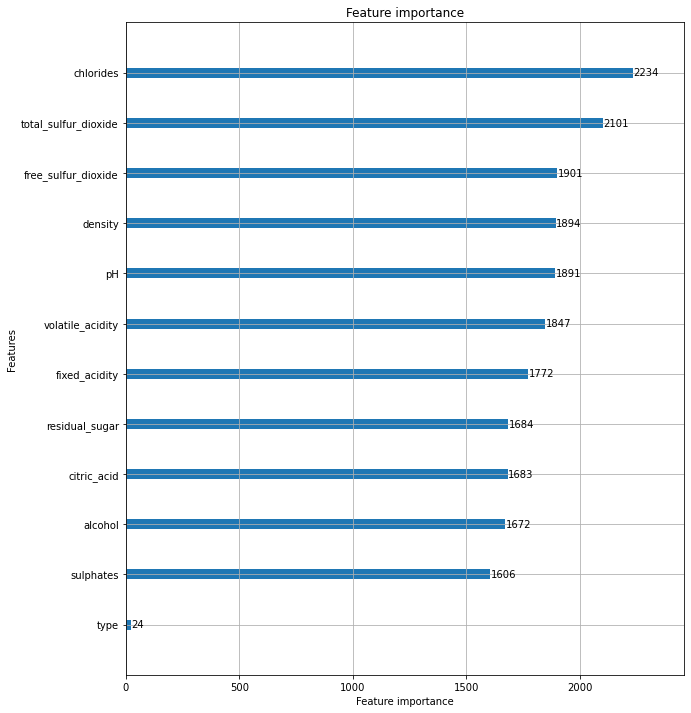

In [24]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

chlorides가 가장 중요한 피쳐, 즉 chlorides가 확률값 계산에 중요하게 작용되었다.

## 스태킹

### CV 세트 기반의 스태킹을 진행하려 한다. 개별 기반 모델들이 교차 검증을 통해 최종 메타 모델이 사용할 학습용, 테스트용 데이터를 생성하기 위한 함수를 작성하시오.
```
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    return train_fold_pred , test_pred_mean
```

In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n.iloc[train_index] 
        y_tr = y_train_n.iloc[train_index] 
        X_te = X_train_n.iloc[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

### 스태킹에 사용될 머신러닝 알고리즘 클래스를 생성하시오.
- 개별 모델: KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, 에이다부스트(n_estimators=100), LightGBM(n_estimators=400)
- 최종 모델: 로지스틱 회귀(C=10)

In [26]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100,random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)
lgbm_clf = LGBMClassifier(n_estimators=400)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

### 개별 모델별로 get_stacking_base_datasets 함수를 수행하여 최종 메타 모델이 사용할 학습용, 테스트용 데이터를 생성하시오.
- 폴드 개수는 7개

In [27]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
LGBMClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


### 생성된 학습용 데이터와 테스트용 데이터를 각각 합치시오.
- 학습용 데이터는 Stack_final_X_train
- 테스트용 데이터는 Stack_final_X_test

In [28]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test, lgbm_test), axis=1)
# 잘 진행되었는지 shape 확인
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (4397, 12) 원본 테스트 피처 Shape: (1100, 12)
스태킹 학습 피처 데이터 Shape: (4397, 5) 스태킹 테스트 피처 데이터 Shape: (1100, 5)


### 최종 메타 모델인 로지스틱 회귀를 사용하여 학습 및 예측을 진행하고 최종 메타 모델의 예측 정확도를 출력하시오.

In [29]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.6209


# 버섯 독성 여부 분류 - CatBoost 실습

mushrooms.csv 파일을 사용합니다.

독성 버섯인지 식용 가능한 버섯인지 분류해내는 것이 목표입니다.

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

데이터셋 출처: https://www.kaggle.com/datasets/uciml/mushroom-classification

In [30]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np

In [31]:
#데이터셋 불러오기
mushroom = pd.read_csv('mushrooms.csv')

## 데이터 전처리

### info()를 통해 결측치가 있는지 확인하시오.

In [32]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

결측치 없고 모두 카테고리 변수

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_mushroom, y_mushroom으로 저장하시오
- target은 class

In [33]:
X_mushroom = mushroom.drop(['class'], axis=1)
y_mushroom = mushroom['class']

In [34]:
#데이터 확인(X_mushroom)
X_mushroom.head(3)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m


In [35]:
#데이터 확인(y_mushroom)
y_mushroom.head(3)

0    p
1    e
2    e
Name: class, dtype: object

### train_test_split()을 이용해 train set과 test set을 분리하시오.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, test_size=0.2, random_state=123)

In [37]:
#잘 분리되었는지 확인
print(X_train.shape, X_test.shape)

(6499, 22) (1625, 22)


### CatBoost를 진행할 수 있도록 범주형 변수를 처리하시오.
- trainset은 train_pool에 저장
- testset은 test_pool에 저장

In [38]:
from catboost import Pool

train_pool = Pool(data=X_train, label=y_train,
                  cat_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat'])
test_pool = Pool(data=X_test, label=y_test,
                 cat_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat'])

### CatBoost 모델을 기반으로 버섯에 대한 정보를 학습하고 버섯의 독성 여부를 예측하시오.
- iteration=400, learning_rate=0.1, max_depth=3
- catb_predes, catb_pred_proba

In [39]:
from catboost import CatBoostClassifier

catb = CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
catb.fit(train_pool)
catb_preds = catb.predict(test_pool)
catb_pred_proba = catb.predict_proba(test_pool)[:, 1]

0:	learn: 0.4779436	total: 166ms	remaining: 1m 6s
1:	learn: 0.3395324	total: 194ms	remaining: 38.7s
2:	learn: 0.2347481	total: 229ms	remaining: 30.3s
3:	learn: 0.1785895	total: 264ms	remaining: 26.1s
4:	learn: 0.1317549	total: 296ms	remaining: 23.4s
5:	learn: 0.0871102	total: 324ms	remaining: 21.3s
6:	learn: 0.0678277	total: 348ms	remaining: 19.5s
7:	learn: 0.0552047	total: 377ms	remaining: 18.5s
8:	learn: 0.0458919	total: 402ms	remaining: 17.5s
9:	learn: 0.0391817	total: 433ms	remaining: 16.9s
10:	learn: 0.0357411	total: 468ms	remaining: 16.5s
11:	learn: 0.0310481	total: 500ms	remaining: 16.2s
12:	learn: 0.0272550	total: 533ms	remaining: 15.9s
13:	learn: 0.0245675	total: 568ms	remaining: 15.7s
14:	learn: 0.0220894	total: 606ms	remaining: 15.5s
15:	learn: 0.0204985	total: 639ms	remaining: 15.3s
16:	learn: 0.0190451	total: 678ms	remaining: 15.3s
17:	learn: 0.0177786	total: 715ms	remaining: 15.2s
18:	learn: 0.0164332	total: 754ms	remaining: 15.1s
19:	learn: 0.0155367	total: 794ms	remaini

161:	learn: 0.0029020	total: 5.58s	remaining: 8.2s
162:	learn: 0.0029020	total: 5.62s	remaining: 8.18s
163:	learn: 0.0029001	total: 5.66s	remaining: 8.15s
164:	learn: 0.0025501	total: 5.7s	remaining: 8.12s
165:	learn: 0.0025501	total: 5.73s	remaining: 8.07s
166:	learn: 0.0025501	total: 5.76s	remaining: 8.04s
167:	learn: 0.0025501	total: 5.8s	remaining: 8.01s
168:	learn: 0.0025501	total: 5.83s	remaining: 7.96s
169:	learn: 0.0025501	total: 5.86s	remaining: 7.93s
170:	learn: 0.0025501	total: 5.89s	remaining: 7.88s
171:	learn: 0.0025501	total: 5.91s	remaining: 7.84s
172:	learn: 0.0025501	total: 5.94s	remaining: 7.79s
173:	learn: 0.0025501	total: 5.97s	remaining: 7.75s
174:	learn: 0.0025501	total: 6s	remaining: 7.72s
175:	learn: 0.0025501	total: 6.04s	remaining: 7.68s
176:	learn: 0.0025501	total: 6.07s	remaining: 7.65s
177:	learn: 0.0025501	total: 6.13s	remaining: 7.64s
178:	learn: 0.0025501	total: 6.16s	remaining: 7.6s
179:	learn: 0.0025500	total: 6.19s	remaining: 7.57s
180:	learn: 0.00255

324:	learn: 0.0024174	total: 10.9s	remaining: 2.52s
325:	learn: 0.0024174	total: 11s	remaining: 2.49s
326:	learn: 0.0024174	total: 11s	remaining: 2.45s
327:	learn: 0.0023844	total: 11s	remaining: 2.42s
328:	learn: 0.0023844	total: 11.1s	remaining: 2.39s
329:	learn: 0.0022427	total: 11.1s	remaining: 2.35s
330:	learn: 0.0022427	total: 11.1s	remaining: 2.32s
331:	learn: 0.0022426	total: 11.2s	remaining: 2.29s
332:	learn: 0.0022426	total: 11.2s	remaining: 2.25s
333:	learn: 0.0022426	total: 11.2s	remaining: 2.21s
334:	learn: 0.0022426	total: 11.2s	remaining: 2.18s
335:	learn: 0.0022426	total: 11.3s	remaining: 2.15s
336:	learn: 0.0022426	total: 11.3s	remaining: 2.11s
337:	learn: 0.0022426	total: 11.3s	remaining: 2.08s
338:	learn: 0.0022070	total: 11.4s	remaining: 2.04s
339:	learn: 0.0022070	total: 11.4s	remaining: 2.01s
340:	learn: 0.0022070	total: 11.4s	remaining: 1.98s
341:	learn: 0.0022070	total: 11.5s	remaining: 1.94s
342:	learn: 0.0022060	total: 11.5s	remaining: 1.91s
343:	learn: 0.0022

### 예측 성능을 평가하시오.

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , catb_preds)
accuracy

1.0